In [1]:
# to suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Define the problem

Predict the success of a game based on its features.

# Step 2: Collect and preprocess the data

### Import Video Games Sales data from Kaggle 
It must be done using the following link: https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings

In [3]:
df = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E


### Clean and preprocess the data

1) Drop unnecessary columns

In [4]:
df = df.drop(columns=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df.head(3)

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.54,76.0,51.0,8.0,324.0,E
1,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,35.57,82.0,73.0,8.3,712.0,E


2) Check for missing values

In [5]:
print(df.isna().sum())

Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64


3) Drop rows with missing values in Critic_Score, Critic_Count, User_Score, User_Count and Rating columns

In [6]:
df = df.dropna(subset=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'])
df.head(3)

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.54,76.0,51.0,8.0,324.0,E
2,Wii,2008.0,Racing,Nintendo,35.57,82.0,73.0,8.3,712.0,E
3,Wii,2009.0,Sports,Nintendo,32.78,80.0,73.0,8.0,193.0,E


4) Create a binary label for success:

In [7]:
# Define a sales threshold for a game to be considered successful
sales_threshold = 1.0

# Create a new binary column Successful based on the sales threshold
df['Successful'] = df['Global_Sales'].apply(lambda x: 1 if x >= sales_threshold else 0)

# Drop the Global_Sales column as it's not needed anymore
df = df.drop(columns=['Global_Sales'])

df.head(3)

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Successful
0,Wii,2006.0,Sports,Nintendo,76.0,51.0,8.0,324.0,E,1
2,Wii,2008.0,Racing,Nintendo,82.0,73.0,8.3,712.0,E,1
3,Wii,2009.0,Sports,Nintendo,80.0,73.0,8.0,193.0,E,1


5) Encode categorical features using LabelEncoder:

In [8]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode Platform, Genre, and Rating columns
df['Platform'] = encoder.fit_transform(df['Platform'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Rating'] = encoder.fit_transform(df['Rating'])
df['Year_of_Release'] = encoder.fit_transform(df['Year_of_Release'])
df['Publisher'] = encoder.fit_transform(df['Publisher'])

df.head(3)

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Successful
0,12,14,10,171,76.0,51.0,8.0,324.0,1,1
2,12,16,6,171,82.0,73.0,8.3,712.0,1,1
3,12,17,10,171,80.0,73.0,8.0,193.0,1,1


6) Scale the numerical features using StandardScaler:

In [9]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale 'Critic_Score' and 'User_Score' columns
df[['Critic_Score', 'User_Score']] = scaler.fit_transform(df[['Critic_Score', 'User_Score']])
df.head(3)

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Successful
0,12,14,10,171,0.415287,51.0,0.570220,324.0,1,1
2,12,16,6,171,0.847089,73.0,0.777919,712.0,1,1
3,12,17,10,171,0.703155,73.0,0.570220,193.0,1,1


7) Split the data into features and labels, and then into training and testing sets:

In [10]:
# Separate features and labels
X = df.drop(columns=['Successful'])
y = df['Successful']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Select a model

<details>
  <summary>►Why choose a logistic regression model?</summary>
Selecting an appropriate model is crucial for the success of a machine learning project. The choice of the model depends on the problem type, dataset size, data distribution, and the complexity of the problem.

For this problem, we're trying to predict whether a game will be successful or not, which is a binary classification task. Logistic Regression is a simple and widely used algorithm for binary classification problems that works well when the relationship between the features and the target variable can be captured by a linear function. Here are some reasons why Logistic Regression might be a good choice for this problem:

- Interpretability: Logistic Regression provides a simple and interpretable model. It estimates the probabilities of the classes by calculating the linear combination of the features and applying the logistic function (sigmoid function). This allows us to see the contribution of each feature towards the probability of success and helps us to identify the most important features that affect a game's success.

- Efficiency: Logistic Regression is computationally efficient, making it suitable for cases when you have a large dataset or limited computational resources. It is a relatively fast algorithm because it only requires a single pass through the data to estimate the model parameters.

- Baseline model: Logistic Regression is often used as a baseline model for classification tasks. It is a good starting point to evaluate the performance of the model on the dataset. If the performance is satisfactory, you can use the Logistic Regression model as-is, or you can explore more complex models to see if they can achieve better results.

- Regularization: Logistic Regression supports regularization techniques like L1 (Lasso) and L2 (Ridge) regularization, which can help prevent overfitting and improve the model's generalization to new data.

However, it's important to note that Logistic Regression has its limitations. It assumes a linear relationship between the features and the target variable, and it might not perform well when there are complex interactions between features or when the relationship is non-linear. In such cases, other models like Random Forest, Support Vector Machines, or Neural Networks might perform better.

In summary, Logistic Regression is a good starting point for this binary classification problem due to its interpretability, efficiency, and simplicity. After evaluating the performance of the Logistic Regression model, you can compare it with other models to see if they yield better results.

# Step 4: Train the model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a Logistic Regression object with L2 (Ridge) regularization
logreg = LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=300)

> **_NOTE:_**   
> _penalty_: specifies the type of regularization applied ('l1' for Lasso, 'l2' for Ridge, or 'none' for no regularization). By default, it's set to 'l2'. <br>
> _C_: is the inverse of the regularization strength (a smaller value means stronger regularization). By default, it's set to 1.0.

In [12]:
# Standardize features before training the model.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Step 5: Evaluate the model using various metrics:

<details>
  <summary>►Accuracy, Precision, Recall, F1-score explanation</summary>

Accuracy, precision, recall, and F1-score are common evaluation metrics used in classification tasks to assess the performance of a machine learning model. Understanding these metrics helps you interpret the results, compare different models, and decide on the best model for your problem.

- Accuracy: Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. It measures how well the model has predicted both positive and negative classes. However, accuracy can be misleading when dealing with imbalanced datasets, where one class has a much higher frequency than the other. In such cases, a high accuracy may not indicate a good model.

> Formula: (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives)

- Precision: Precision is the ratio of correctly predicted positive instances to the total predicted positive instances. It measures the proportion of true positive predictions among all positive predictions. A high precision indicates that when the model predicts the positive class, it is likely to be correct.

> Formula: True Positives / (True Positives + False Positives)

- Recall (Sensitivity, True Positive Rate): Recall is the ratio of correctly predicted positive instances to the total actual positive instances. It measures the ability of the model to identify all the positive instances. A high recall indicates that the model is good at finding the positive instances.

> Formula: True Positives / (True Positives + False Negatives)

- F1-score: F1-score is the harmonic mean of precision and recall. It balances both precision and recall, giving equal importance to both. F1-score is especially useful when dealing with imbalanced datasets, as it provides a single metric that considers both false positives and false negatives. A high F1-score indicates that the model has both high precision and recall.

> Formula: 2 * (Precision * Recall) / (Precision + Recall)

These metrics are important because they provide different perspectives on the model's performance. While accuracy can give a general idea of the model's performance, precision, recall, and F1-score help you better understand how the model is performing on the positive class, which is often more important in real-world applications.

By analyzing these metrics, you can decide if the model meets your requirements or if you need to fine-tune it, try other algorithms, or reframe the problem. In some cases, you might prioritize one metric over others, depending on the problem domain and the specific costs of false positives and false negatives.
</details>

<details>
  <summary>►Guideline for interpreting these values</summary>
    The values of evaluation metrics like accuracy, precision, recall, and F1-score range between 0 and 1. A higher value typically indicates better performance. However, determining what constitutes a "good" result depends on the context, problem domain, and specific requirements of the project. Here's a general guideline for interpreting these values:

- Accuracy: An accuracy of 1.0 means that the model has correctly classified all instances in the dataset. However, achieving perfect accuracy is rare and often not realistic. As a rule of thumb, if the accuracy is significantly higher than the proportion of the majority class in the dataset, it can be considered a good result. For example, if you have a balanced dataset with 50% positive and 50% negative instances, an accuracy above 0.7 or 0.8 may be considered good.

- Precision: A precision of 1.0 means that all positive predictions made by the model are correct. In practice, a precision value of 0.8 or higher is generally considered good. However, the importance of precision depends on the problem domain. For example, in a spam detection system, high precision is crucial to avoid marking legitimate emails as spam.

- Recall: A recall of 1.0 means that the model has identified all positive instances in the dataset. Similar to precision, a recall value of 0.8 or higher is generally considered good. The importance of recall depends on the problem domain as well. In medical diagnosis or fraud detection, high recall is critical to ensure all positive cases are identified.

- F1-score: An F1-score of 1.0 indicates perfect precision and recall. In practice, an F1-score above 0.7 or 0.8 can be considered good. However, the F1-score should be evaluated in the context of the problem and the balance between precision and recall. For imbalanced datasets or problems where both false positives and false negatives are costly, the F1-score is a more informative metric than accuracy.

It's important to note that these metrics should not be evaluated in isolation but should be considered together to get a comprehensive view of the model's performance. Depending on the specific problem and requirements, you may need to prioritize one metric over others or find a balance between them. Additionally, comparing these metrics across different models can help you choose the best model for your problem.
</details>

<details>
  <summary>►How to choose right value for zero_division parameter</summary>
The zero_division parameter allows you to specify a value to return when the metric is undefined due to having no predicted samples (for precision) or no true samples (for recall and F1-score). The choice of zero_division depends on the context and how you want to handle these undefined cases.

Typically, there are three common choices for the zero_division parameter:

    0: Setting zero_division to 0 assumes that the model performed poorly when it didn't make any positive predictions or when there were no true positive instances. This choice is conservative and penalizes the model in these cases.

    1: Setting zero_division to 1 assumes that the model performed well when it didn't make any positive predictions or when there were no true positive instances. This choice is lenient and rewards the model in these cases.

    'warn' (default): This option returns 0 for the metric and issues a warning message, drawing your attention to the fact that the metric is ill-defined. This can be helpful during model development and debugging, as it alerts you to potential issues in your data or model.

There is no universally "best" choice for the zero_division parameter, as it depends on how you want to handle these undefined cases in your specific problem. If you want to be conservative and penalize the model when it doesn't make any positive predictions, set zero_division to 0. If you want to be lenient and reward the model in these cases, set zero_division to 1. If you want to be alerted to potential issues during development, leave it as the default 'warn'.
</details>

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.83
Precision: 0.69
Recall: 0.25
F1-score: 0.37
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1145
           1       0.69      0.25      0.37       278

    accuracy                           0.83      1423
   macro avg       0.76      0.61      0.64      1423
weighted avg       0.81      0.83      0.80      1423



# Step 6: Fine-tune the model

Fine-tuning a model involves adjusting its hyperparameters to improve performance. This process can be done using different search techniques, such as Grid Search or Randomized Search. In this example, we'll use Grid Search with cross-validation to find the best hyperparameters for our Logistic Regression model.

In [14]:
from sklearn.model_selection import GridSearchCV

1) Define the hyperparameter search space:

In [15]:
# Specify the hyperparameter search space for the logistic regression
param_grid = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'penalty': ['l2', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
]

2) Create a GridSearchCV object with the Logistic Regression model:

In [16]:
# Create a GridSearchCV object with the logistic regression model and the search space
logreg_grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, scoring='f1', cv=3)

3) Perform the grid search and fit the model to the training data:

In [17]:
# Fit the GridSearchCV object to the training data to find the best hyperparameters
logreg_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2', None],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['saga']}],
             scoring='f1')

4) Check the best hyperparameters and their corresponding score:

In [18]:
# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {logreg_grid.best_params_}")
print(f"Best F1-score: {logreg_grid.best_score_:.2f}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}
Best F1-score: 0.41


5) Use the best model for predictions and evaluation:

In [19]:
# Use the best logistic regression model for predictions
best_logreg = logreg_grid.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.83
Precision: 0.69
Recall: 0.25
F1-score: 0.37
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1145
           1       0.69      0.25      0.37       278

    accuracy                           0.83      1423
   macro avg       0.76      0.61      0.64      1423
weighted avg       0.81      0.83      0.80      1423



6) Evaluate the best model

In [20]:
from sklearn.metrics import classification_report

best_model = logreg_grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1145
           1       0.69      0.25      0.37       278

    accuracy                           0.83      1423
   macro avg       0.76      0.61      0.64      1423
weighted avg       0.81      0.83      0.80      1423



7) Analyze the confusion matrix:

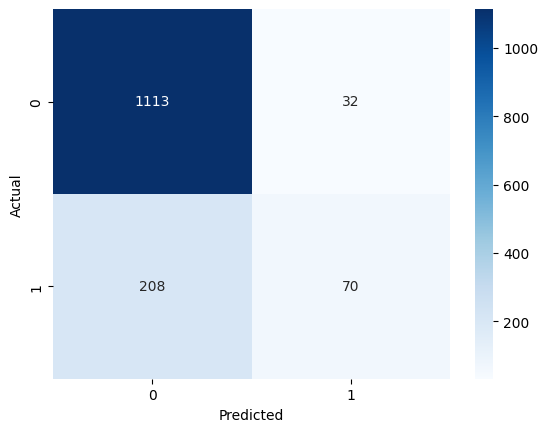

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8) Inspect the feature importances

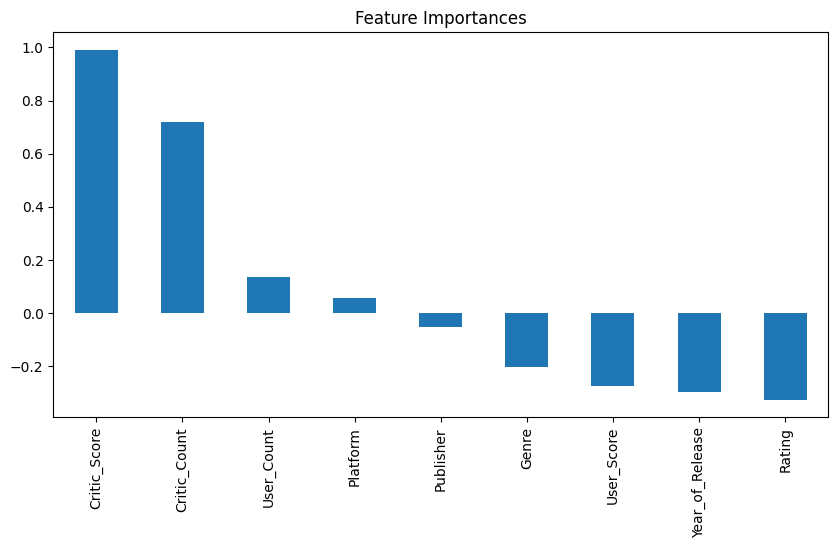

In [22]:
feature_importances = pd.Series(best_model.coef_[0], index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()